In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, GRU, Input, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 6, 6)]            0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 4)                 120       
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 125 (500.00 Byte)
Trainable params: 125 (500.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
313/313 [==============================] - 5s 5ms/step - loss: 0.0254
Epoch 2/10
313/313 [==============================] - 3s 9ms/step - loss: 0.0124
Epoch 3/10
313/313 [==============================] - 2s 

<ipython-input-8-f954f54739b7>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  generated_data[i+offset] = y


1/1 [==============================] - 0s 20ms/step


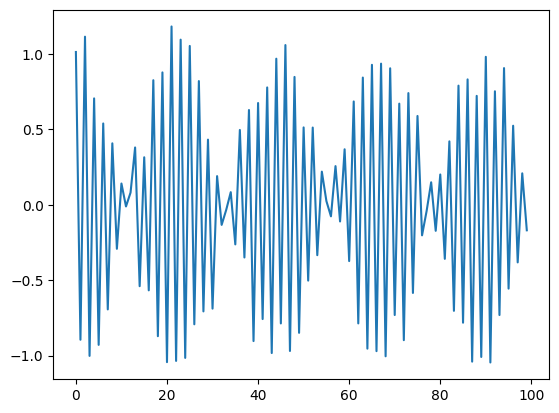

In [8]:


N = 10000
data = np.array([np.cos(3*x) for x in range(N)]) + 0.1 * np.random.randn(N)
plt.plot(data[:100])

offset = 3
seq_length = offset*2+1
X_train = np.array([np.diag(np.hstack((data[i:i+offset], data[i+offset+1:i+seq_length]))) for i in range(N-seq_length)])
Y_train = data[offset:N-offset-1]
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))
model.summary()

history = model.fit(X_train, Y_train, batch_size=32, epochs=10)

M = 200
generated_data = np.zeros(M)
generated_data[:offset] = data[:offset]
for i in range(M-offset-1):
    x = np.diag(np.hstack((generated_data[i:i+offset], data[i+offset+1:i+seq_length])))
    x = np.expand_dims(x, axis=0)
    y = model.predict(x)
    generated_data[i+offset] = y


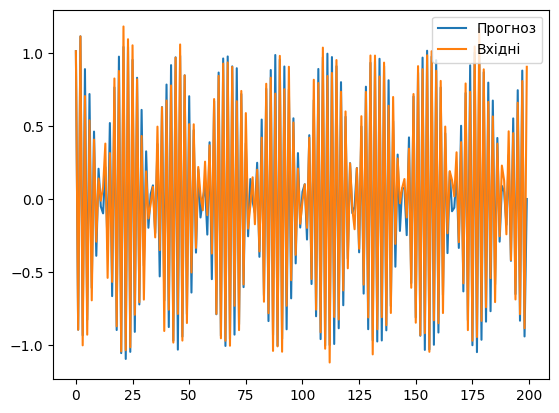

In [10]:

plt.plot(generated_data[:M], label='Прогноз')
plt.plot(data[:M], label='Вхідні')
plt.legend()
plt.show()


Висновок:
Побудувати графік. В даній лабороторній роботі було побудовано двонаправлену нейронну мережу для розрахунку функції із шумом. Для тестування було взято тригонометричну функцію cos(3x). Для визуаліазації даних викорстовувались графіки.